In [2]:
import pandas as pd

df1=pd.read_csv('kijiji_data_MM.csv')
df2 = pd.read_csv('CSDpop.csv')


In [3]:
df1 = df1.drop(['CSDNAME','Latitude','Longitude','Location','Title','adId','URL','Date Posted'],axis=1)

In [4]:
df1.columns

Index(['CSDUID', 'Type', 'Price', 'Bedrooms', 'Bathrooms', 'Hydro', 'Heat',
       'Water', 'Size', 'Agreement Type'],
      dtype='object')

In [5]:
df1['Size'] = pd.to_numeric(df1['Size'], errors='coerce')

In [6]:
import numpy as np
for index, row in df1.iterrows():
    if row['Size'] < 200 or row['Size'] > 7000:
        df1.at[index, 'Size'] = np.nan

In [7]:
df1['Size'].isnull().sum()

14963

In [8]:
df1['Size'] = pd.to_numeric(df1['Size'], errors='coerce')
df1['Size'].fillna(value = df1.Size.mean(), inplace = True)

In [9]:
merged_df1 = df1.merge(df2, on='CSDUID', how='left')

In [10]:
merged_df1.head()

,CSDUID,Type,Price,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type,Population
0,3501005,Apartment,"$1,425",Bedrooms: 2,Bathrooms: 1,N,Y,Y,950.000000,1 Year,14211
1,3501005,Apartment,"$1,100",Bedrooms: 2,Bathrooms: 1,N,N,Y,780.000000,1 Year,14211
2,3501005,House,"$2,700",Bedrooms: 3,Bathrooms: 2.5,N,Y,Y,693.228433,1 Year,14211
3,3501005,House,"$1,200",Bedrooms: 2,Bathrooms: 1.5,N,N,Y,900.000000,1 Year,14211
4,3501005,House,"$4,000",Bedrooms: 2 + Den,Bathrooms: 3,N,Y,Y,693.228433,1 Year,14211


In [11]:
merged_df1['Price'] = merged_df1['Price'].str.replace('$', '')
merged_df1['Price'] = merged_df1['Price'].str.replace(',', '')

merged_df1['Price'] = pd.to_numeric(merged_df1['Price'], errors='coerce')

<ipython-input-11-e34c3ce191d7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df1['Price'] = merged_df1['Price'].str.replace('$', '')


In [12]:

def priceConv(p):
    if p <= 1400:
        return 'Low'
    elif p <= 2000 and p >= 1400:
        return 'Medium'

    elif p >= 2000:
      return 'High'
merged_df1['Price_Category'] = merged_df1['Price'].apply(priceConv)


In [13]:
merged_df1['Price_Category'].value_counts()

High      12638
Medium     9338
Low        3756
Name: Price_Category, dtype: int64

In [14]:
merged_df1.head(100)

,CSDUID,Type,Price,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type,Population,Price_Category
0,3501005,Apartment,1425.0,Bedrooms: 2,Bathrooms: 1,N,Y,Y,950.000000,1 Year,14211,Medium
1,3501005,Apartment,1100.0,Bedrooms: 2,Bathrooms: 1,N,N,Y,780.000000,1 Year,14211,Low
2,3501005,House,2700.0,Bedrooms: 3,Bathrooms: 2.5,N,Y,Y,693.228433,1 Year,14211,High
3,3501005,House,1200.0,Bedrooms: 2,Bathrooms: 1.5,N,N,Y,900.000000,1 Year,14211,Low
4,3501005,House,4000.0,Bedrooms: 2 + Den,Bathrooms: 3,N,Y,Y,693.228433,1 Year,14211,High
...,...,...,...,...,...,...,...,...,...,...,...,...
95,3501012,Duplex/Triplex,2100.0,Bedrooms: 3,Bathrooms: 2,N,N,Y,693.228433,1 Year,49442,High
96,3501012,Condo,1850.0,Bedrooms: 2,Bathrooms: 1,N,N,N,900.000000,1 Year,49442,Medium
97,3501012,Duplex/Triplex,1500.0,Bedrooms: 2,Bathrooms: 1,N,N,Y,750.000000,1 Year,49442,Medium
98,3501012,Duplex/Triplex,1400.0,Bedrooms: 2 + Den,Bathrooms: 1,N,N,Y,500.000000,1 Year,49442,Low


In [15]:
# Perform one-hot encoding to Hydro, Heat and Water
one_hot_encoded1 = pd.get_dummies(merged_df1['Hydro'], prefix='Hydro')
one_hot_encoded2 = pd.get_dummies(merged_df1['Heat'], prefix='Heat')
one_hot_encoded3 = pd.get_dummies(merged_df1['Water'], prefix='water')
one_hot_encoded4 = pd.get_dummies(merged_df1['Price_Category'], prefix='pc')
# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([merged_df1, one_hot_encoded1,one_hot_encoded2,one_hot_encoded3,one_hot_encoded4], axis=1)

In [16]:
df_encoded.head()

,CSDUID,Type,Price,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type,...,Price_Category,Hydro_N,Hydro_Y,Heat_N,Heat_Y,water_N,water_Y,pc_High,pc_Low,pc_Medium
0,3501005,Apartment,1425.0,Bedrooms: 2,Bathrooms: 1,N,Y,Y,950.000000,1 Year,...,Medium,1,0,0,1,0,1,0,0,1
1,3501005,Apartment,1100.0,Bedrooms: 2,Bathrooms: 1,N,N,Y,780.000000,1 Year,...,Low,1,0,1,0,0,1,0,1,0
2,3501005,House,2700.0,Bedrooms: 3,Bathrooms: 2.5,N,Y,Y,693.228433,1 Year,...,High,1,0,0,1,0,1,1,0,0
3,3501005,House,1200.0,Bedrooms: 2,Bathrooms: 1.5,N,N,Y,900.000000,1 Year,...,Low,1,0,1,0,0,1,0,1,0
4,3501005,House,4000.0,Bedrooms: 2 + Den,Bathrooms: 3,N,Y,Y,693.228433,1 Year,...,High,1,0,0,1,0,1,1,0,0


In [17]:
df_encoded=df_encoded.drop(['Hydro','Heat','Water','Price_Category'],axis=1)

In [18]:
! pip install category_encoders
import category_encoders as ce


#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='Type',handle_unknown='return_nan',return_df=True,use_cat_names=True)

#Original Data
df_encoded

df_encoded= encoder.fit_transform(df_encoded)
df_encoded

,CSDUID,Type_Apartment,Type_House,Type_Townhouse,Type_Duplex/Triplex,Type_Basement,Type_Condo,Price,Bedrooms,Bathrooms,...,Population,Hydro_N,Hydro_Y,Heat_N,Heat_Y,water_N,water_Y,pc_High,pc_Low,pc_Medium
0,3501005,1.0,0.0,0.0,0.0,0.0,0.0,1425.0,Bedrooms: 2,Bathrooms: 1,...,14211,1,0,0,1,0,1,0,0,1
1,3501005,1.0,0.0,0.0,0.0,0.0,0.0,1100.0,Bedrooms: 2,Bathrooms: 1,...,14211,1,0,1,0,0,1,0,1,0
2,3501005,0.0,1.0,0.0,0.0,0.0,0.0,2700.0,Bedrooms: 3,Bathrooms: 2.5,...,14211,1,0,0,1,0,1,1,0,0
3,3501005,0.0,1.0,0.0,0.0,0.0,0.0,1200.0,Bedrooms: 2,Bathrooms: 1.5,...,14211,1,0,1,0,0,1,0,1,0
4,3501005,0.0,1.0,0.0,0.0,0.0,0.0,4000.0,Bedrooms: 2 + Den,Bathrooms: 3,...,14211,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25727,3560010,1.0,0.0,0.0,0.0,0.0,0.0,1100.0,Bedrooms: 2,Bathrooms: 1,...,15766,1,0,0,1,0,1,0,1,0
25728,3560010,0.0,1.0,0.0,0.0,0.0,0.0,2700.0,Bedrooms: 3,Bathrooms: 2,...,15766,1,0,1,0,0,1,1,0,0
25729,3560090,0.0,1.0,0.0,0.0,0.0,0.0,3000.0,Bedrooms: 2,Bathrooms: 1,...,7294,0,1,0,1,0,1,1,0,0
25730,3560090,0.0,1.0,0.0,0.0,0.0,0.0,1800.0,Bedrooms: 2,Bathrooms: 1,...,7294,1,0,1,0,0,1,0,0,1


In [19]:

encoder=ce.OneHotEncoder(cols='Bedrooms',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_encoded= encoder.fit_transform(df_encoded)

In [20]:

encoder=ce.OneHotEncoder(cols='Bathrooms',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_encoded= encoder.fit_transform(df_encoded)

In [21]:
df_encoded.head()

,CSDUID,Type_Apartment,Type_House,Type_Townhouse,Type_Duplex/Triplex,Type_Basement,Type_Condo,Price,Bedrooms_Bedrooms: 2,Bedrooms_Bedrooms: 3,...,Population,Hydro_N,Hydro_Y,Heat_N,Heat_Y,water_N,water_Y,pc_High,pc_Low,pc_Medium
0,3501005,1.0,0.0,0.0,0.0,0.0,0.0,1425.0,1.0,0.0,...,14211,1,0,0,1,0,1,0,0,1
1,3501005,1.0,0.0,0.0,0.0,0.0,0.0,1100.0,1.0,0.0,...,14211,1,0,1,0,0,1,0,1,0
2,3501005,0.0,1.0,0.0,0.0,0.0,0.0,2700.0,0.0,1.0,...,14211,1,0,0,1,0,1,1,0,0
3,3501005,0.0,1.0,0.0,0.0,0.0,0.0,1200.0,1.0,0.0,...,14211,1,0,1,0,0,1,0,1,0
4,3501005,0.0,1.0,0.0,0.0,0.0,0.0,4000.0,0.0,0.0,...,14211,1,0,0,1,0,1,1,0,0


In [22]:
df_encoded=df_encoded.drop(['CSDUID'],axis=1)

In [23]:
df_encoded=df_encoded.drop(['Agreement Type'],axis=1)

In [24]:
df_encoded.to_csv('clean_data.csv')

In [25]:
df_encoded.columns

Index(['Type_Apartment', 'Type_House', 'Type_Townhouse', 'Type_Duplex/Triplex',
       'Type_Basement', 'Type_Condo', 'Price', 'Bedrooms_Bedrooms: 2',
       'Bedrooms_Bedrooms: 3', 'Bedrooms_Bedrooms: 2 + Den',
       'Bedrooms_Bedrooms: 1', 'Bedrooms_Bedrooms: 4', 'Bedrooms_Bedrooms: 5+',
       'Bedrooms_Bedrooms: 3 + Den', 'Bedrooms_Bedrooms: Bachelor/Studio',
       'Bedrooms_Bedrooms: 4 + Den', 'Bedrooms_Bedrooms: 1 + Den',
       'Bathrooms_Bathrooms: 1', 'Bathrooms_Bathrooms: 2.5',
       'Bathrooms_Bathrooms: 1.5', 'Bathrooms_Bathrooms: 3',
       'Bathrooms_Bathrooms: 2', 'Bathrooms_Bathrooms: 3.5',
       'Bathrooms_Bathrooms: 4', 'Bathrooms_Bathrooms: 4.5',
       'Bathrooms_Bathrooms: 5', 'Bathrooms_Bathrooms: 6+',
       'Bathrooms_Bathrooms: 5.5', 'Size', 'Population', 'Hydro_N', 'Hydro_Y',
       'Heat_N', 'Heat_Y', 'water_N', 'water_Y', 'pc_High', 'pc_Low',
       'pc_Medium'],
      dtype='object')

Accuracy: 0.680979211190985


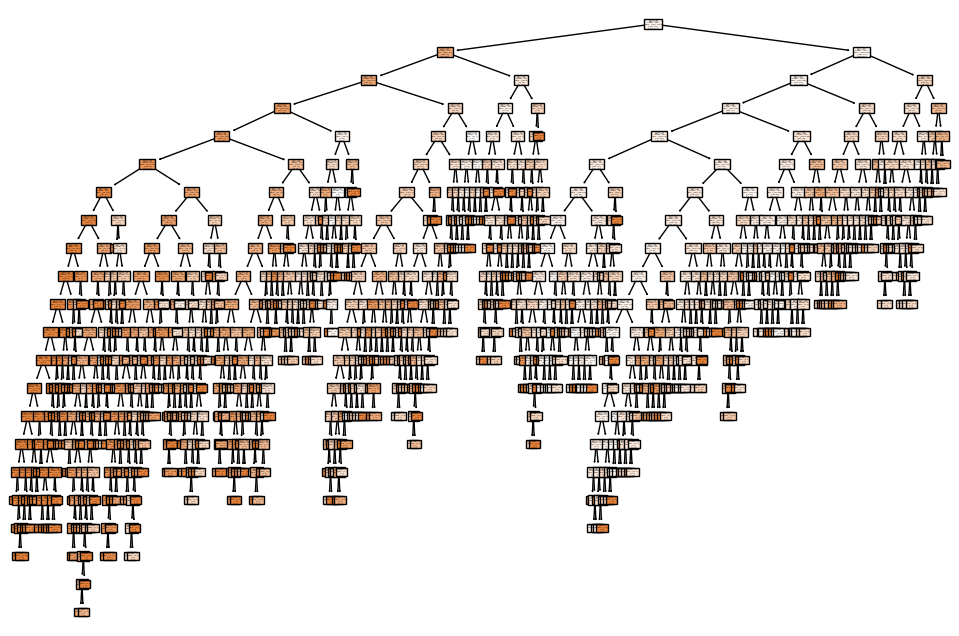

In [28]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


X = df_encoded.drop(['Price','Size', 'Population', 'pc_High', 'pc_Low','pc_Medium'],axis=1)  # Features
y = df_encoded[['pc_High', 'pc_Low','pc_Medium']] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier

dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


plt.figure(figsize=(12, 8))
plot_tree(dt_classifier,filled=True)
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



X = df_encoded.drop(['Price','Size', 'Population', 'pc_High', 'pc_Low','pc_Medium'],axis=1)  # Features
y = df_encoded[['pc_Low']] # Target variable


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

log_reg_classifier = LogisticRegression()

# Train the classifier on the training data
log_reg_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = log_reg_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8704099475422576


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
